In [27]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [28]:
t=cv2.imread("download_1.jpeg")

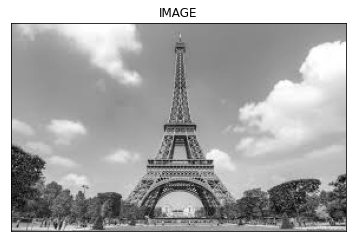

In [29]:
image = cv2.cvtColor(t, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("IMAGE")
plt.show()

# Sobel Operator

In [30]:
def sobel(image):
    Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
    Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
    
    [rows, columns] = np.shape(image)  
    sobel_image = np.zeros(shape=(rows, columns)) 
    gx, gy = np.zeros(shape=(rows, columns)),np.zeros(shape=(rows, columns)) 
    k = Gx.shape[0]
    for i in range(rows - 2):
        for j in range(columns - 2):
            gx[i + 1, j + 1] = np.sum(np.multiply(Gx, image[i:i + k, j:j + k]))  
            gy[i + 1, j + 1] = np.sum(np.multiply(Gy, image[i:i + k, j:j + k]))  
            sobel_image[i + 1, j + 1] = np.sqrt(gx[i + 1, j + 1] ** 2 + gy[i + 1, j + 1] ** 2) 
    return sobel_image, gx, gy

In [31]:
sobel_op = sobel(image)
sobel_image = sobel_op[0]

x_image = sobel_op[1]
y_image = sobel_op[2]

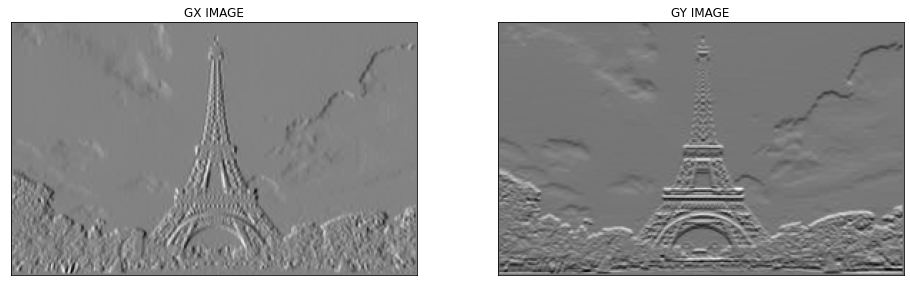

In [32]:
f = plt.figure(figsize = (16,8))
f.add_subplot(1,2,1)

plt.imshow(x_image, cmap="gray")
plt.title("GX IMAGE")
plt.xticks([])
plt.yticks([])


f.add_subplot(1,2,2)

plt.imshow(y_image, cmap='gray')
plt.title("GY IMAGE")
plt.xticks([])
plt.yticks([])
plt.show()

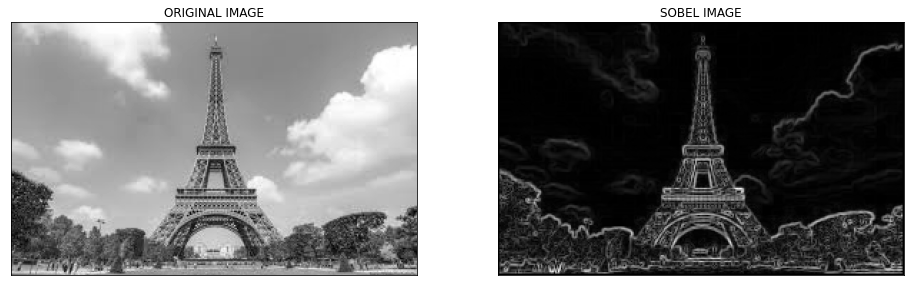

In [33]:
f = plt.figure(figsize = (16,8))
f.add_subplot(1,2,1)

plt.imshow(image, cmap="gray")
plt.title("ORIGINAL IMAGE")
plt.xticks([])
plt.yticks([])


f.add_subplot(1,2,2)

plt.imshow(sobel_image, cmap='gray')
plt.title("SOBEL IMAGE")
plt.xticks([])
plt.yticks([])
plt.show()

# Canny Edge Detection

## 1. Gaussian Filter

In [34]:
import numpy as np

def gaussian_kernel(size, sigma):
    kernel = np.zeros((size, size))
    center = size // 2
    
    for x in range(size):
        for y in range(size):

            distance_x = (x - center) ** 2
            distance_y = (y - center) ** 2

            kernel[x, y] = (1 / (2 * np.pi * sigma ** 2)) * np.exp(-(distance_x + distance_y) / (2 * sigma ** 2))
    
    kernel /= np.sum(kernel)
    
    return kernel

In [35]:
kernel_size = 3
sigma = 1
gaussian_matrix = gaussian_kernel(kernel_size, sigma)

print("Gaussian Kernel:\n", gaussian_matrix)


Gaussian Kernel:
 [[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


In [36]:
def apply_convolution(image, kernel):
    image_height, image_width = image.shape
    kernel_size = kernel.shape[0]
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
 
    smoothed_image = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            smoothed_image[i, j] = np.sum(region * kernel)   
    return smoothed_image


In [37]:
def gaussian_smoothing(image, kernel_size=3, sigma=1):

    gaussian_matrix = gaussian_kernel(kernel_size, sigma)
    smoothed_image = apply_convolution(image, gaussian_matrix)
    
    return smoothed_image


In [38]:
smoothed_image = gaussian_smoothing(image)

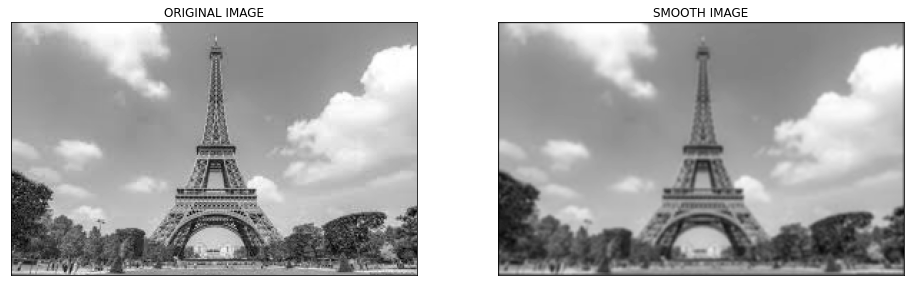

In [39]:
f = plt.figure(figsize = (16,8))
f.add_subplot(1,2,1)

plt.imshow(image, cmap="gray")
plt.title("ORIGINAL IMAGE")
plt.xticks([])
plt.yticks([])


f.add_subplot(1,2,2)

plt.imshow(smoothed_image, cmap='gray')
plt.title("SMOOTH IMAGE")
plt.xticks([])
plt.yticks([])
plt.show()

## 2. Gradient Calculation (sobel operator)

In [40]:
def sobel(image):
    Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
    Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
    
    [rows, columns] = np.shape(image)  
    sobel_image = np.zeros(shape=(rows, columns)) 
    gx, gy = np.zeros(shape=(rows, columns)),np.zeros(shape=(rows, columns)) 
    k = Gx.shape[0]
    for i in range(rows - 2):
        for j in range(columns - 2):
            gx[i + 1, j + 1] = np.sum(np.multiply(Gx, image[i:i + k, j:j + k]))  
            gy[i + 1, j + 1] = np.sum(np.multiply(Gy, image[i:i + k, j:j + k]))  
            sobel_image[i + 1, j + 1] = np.sqrt(gx[i + 1, j + 1] ** 2 + gy[i + 1, j + 1] ** 2) 
    
    direction = np.arctan2(gy, gx)
    
    return sobel_image, direction

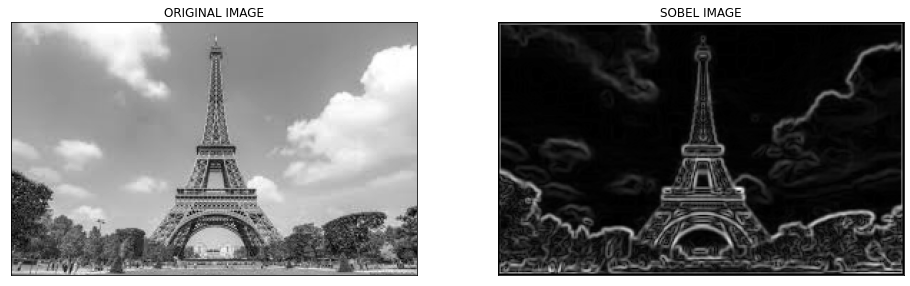

In [41]:
sobel_img, direction = sobel(smoothed_image)

f = plt.figure(figsize = (16,8))
f.add_subplot(1,2,1)

plt.imshow(image, cmap="gray")
plt.title("ORIGINAL IMAGE")
plt.xticks([])
plt.yticks([])


f.add_subplot(1,2,2)

plt.imshow(sobel_img, cmap='gray')
plt.title("SOBEL IMAGE")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
def non_maximum_suppression(magnitude, direction):
    suppressed = np.zeros_like(magnitude)
    angle = direction * 180 / np.pi
    angle[angle < 0] += 180
    
    # Get the size of the image
    rows, cols = magnitude.shape

    # Iterate over each pixel (excluding the borders)
    for r in range(1, rows - 1):
        for c in range(1, cols - 1):
            # Initialize neighboring pixel magnitudes to compare
            neighbor_1 = 0
            neighbor_2 = 0

            # Determine the direction of the edge and compare the magnitudes
            # 0 degrees (horizontal)
            if (0 <= angle[r, c] < 22.5) or (157.5 <= angle[r, c] <= 180):
                neighbor_1 = magnitude[r, c + 1]  # right neighbor
                neighbor_2 = magnitude[r, c - 1]  # left neighbor
            # 45 degrees (diagonal)
            elif 22.5 <= angle[r, c] < 67.5:
                neighbor_1 = magnitude[r + 1, c - 1]  # bottom-left neighbor
                neighbor_2 = magnitude[r - 1, c + 1]  # top-right neighbor
            # 90 degrees (vertical)
            elif 67.5 <= angle[r, c] < 112.5:
                neighbor_1 = magnitude[r + 1, c]  # below neighbor
                neighbor_2 = magnitude[r - 1, c]  # above neighbor
            # 135 degrees (diagonal)
            elif 112.5 <= angle[r, c] < 157.5:
                neighbor_1 = magnitude[r - 1, c - 1]  # top-left neighbor
                neighbor_2 = magnitude[r + 1, c + 1]  # bottom-right neighbor

            # Keep the pixel if it has the highest magnitude among its neighbors
            if magnitude[r, c] >= neighbor_1 and magnitude[r, c] >= neighbor_2:
                suppressed[r, c] = magnitude[r, c]
            else:
                suppressed[r, c] = 0

    return suppressed

# Example usage
import cv2
import matplotlib.pyplot as plt

# Load an image in grayscale
image = cv2.imread('your_image_path.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing (from previous code) to reduce noise
smoothed_image = gaussian_smoothing_from_scratch(image, kernel_size=5, sigma=1)

# Calculate the Sobel gradient magnitude and direction
magnitude, direction = sobel(smoothed_image)

# Perform non-maximum suppression
nms_result = non_maximum_suppression(magnitude, direction)

# Display the result
plt.figure(figsize=(12, 6))

# Show the gradient magnitude after Sobel
plt.subplot(1, 2, 1)
plt.imshow(magnitude, cmap='gray')
plt.title('Sobel Gradient Magnitude')
plt.axis('off')

# Show the result after Non-Maximum Suppression
plt.subplot(1, 2, 2)
plt.imshow(nms_result, cmap='gray')
plt.title('Non-Maximum Suppression')
plt.axis('off')

plt.show()
